In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("delta_complex.csv", sep=",", header=None, skiprows=3,
               names=["Frame #", "BOND", "ANGLE", "DIHED", "UB", "IMP", "CMAP",
                      "VDWAALS", "EEL", "1-4 VDW", "1-4 EEL", "EGB", "ESURF",
                      "GGAS", "GSOLV", "TOTAL"])


In [3]:
df

,Frame #,BOND,ANGLE,DIHED,UB,IMP,CMAP,VDWAALS,EEL,1-4 VDW,1-4 EEL,EGB,ESURF,GGAS,GSOLV,TOTAL
0,2,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.03,0.00,0.0,0.0,0.03,-0.00,-0.02,0.03,0.01
1,3,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.01,0.03,-0.0,-0.0,-0.03,0.00,0.02,-0.03,-0.01
2,4,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.01,-0.17,-0.0,-0.0,0.17,-0.00,-0.18,0.17,-0.01
3,5,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.02,-0.09,0.0,-0.0,0.11,-0.00,-0.11,0.11,-0.00
4,6,-0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.22,0.0,-0.0,0.22,-0.00,-0.23,0.22,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,677,0.0,0.0,0.0,-0.0,0.0,0.0,-38.63,-3.76,0.0,0.0,25.49,-4.76,-42.39,20.72,-21.67
676,678,0.0,-0.0,0.0,-0.0,0.0,0.0,-42.26,-5.21,-0.0,0.0,27.91,-5.43,-47.47,22.48,-24.99
677,679,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-40.74,-2.62,0.0,-0.0,25.06,-4.97,-43.36,20.09,-23.28
678,680,-0.0,0.0,0.0,0.0,0.0,0.0,-43.33,-5.75,-0.0,-0.0,28.71,-5.05,-49.08,23.66,-25.41


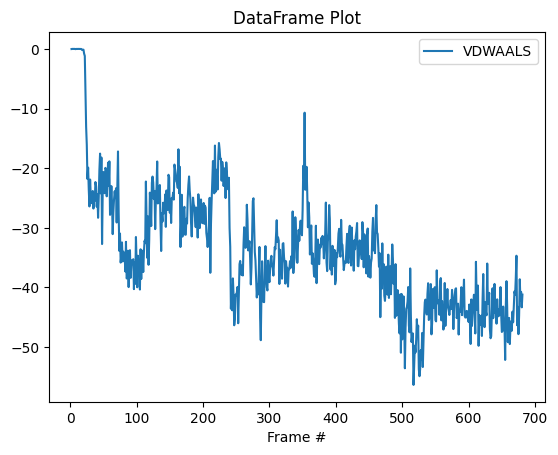

In [4]:
plot = df.plot(df.columns[0], df.columns[7], title="DataFrame Plot") #kcal/mol

In [5]:
# k = 0.008314 #kJ/mol/K
k = 1.987204259e-3 #kcal/mol/K
T = 300      # K

kT = k * T   # kcal/mol
kT

0.5961612777

In [6]:
df.iloc[:,7]

0      -0.03
1      -0.01
2      -0.01
3      -0.02
4      -0.01
       ...  
675   -38.63
676   -42.26
677   -40.74
678   -43.33
679   -41.20
Name: VDWAALS, Length: 680, dtype: float64

In [7]:
#new_df = pd.DataFrame()

#frame_column = [ 'frame', df.iloc[:,0] ]
boltz_column = [ 'boltz_vdw', df.iloc[:,7] ] 

In [8]:
min_vdw = min(boltz_column[1])
min_vdw

-56.34

In [9]:
new_df = df[['Frame #', 'VDWAALS']].copy()

In [10]:
new_df

,Frame #,VDWAALS
0,2,-0.03
1,3,-0.01
2,4,-0.01
3,5,-0.02
4,6,-0.01
...,...,...
675,677,-38.63
676,678,-42.26
677,679,-40.74
678,680,-43.33


In [11]:
np.exp(-1 * boltz_column[1] / kT)

0      1.051610e+00
1      1.016915e+00
2      1.016915e+00
3      1.034117e+00
4      1.016915e+00
           ...     
675    1.384750e+28
676    6.106205e+30
677    4.769517e+29
678    3.674940e+31
679    1.031757e+30
Name: VDWAALS, Length: 680, dtype: float64

In [12]:
new_df['boltz_vdw'] = np.exp(-1 * (boltz_column[1] - min_vdw) / kT) #boltz_column[1]

In [13]:
new_df

,Frame #,VDWAALS,boltz_vdw
0,2,-0.03,9.528311e-42
1,3,-0.01,9.213958e-42
2,4,-0.01,9.213958e-42
3,5,-0.02,9.369816e-42
4,6,-0.01,9.213958e-42
...,...,...,...
675,677,-38.63,1.254679e-13
676,678,-42.26,5.532645e-11
677,679,-40.74,4.321512e-12
678,680,-43.33,3.329750e-10


In [14]:
z = new_df['boltz_vdw'].sum()

In [15]:
z

1.1310190761934762

In [16]:
new_df['prob'] = new_df['boltz_vdw'] / z

In [17]:
new_df

,Frame #,VDWAALS,boltz_vdw,prob
0,2,-0.03,9.528311e-42,8.424536e-42
1,3,-0.01,9.213958e-42,8.146598e-42
2,4,-0.01,9.213958e-42,8.146598e-42
3,5,-0.02,9.369816e-42,8.284402e-42
4,6,-0.01,9.213958e-42,8.146598e-42
...,...,...,...,...
675,677,-38.63,1.254679e-13,1.109335e-13
676,678,-42.26,5.532645e-11,4.891734e-11
677,679,-40.74,4.321512e-12,3.820901e-12
678,680,-43.33,3.329750e-10,2.944026e-10


In [18]:
check = new_df['prob'].sum()
print("\n\t sum over probabilities MUST BE 1. Final value is %5.3f." % check)


	 sum over probabilities MUST BE 1. Final value is 1.000.


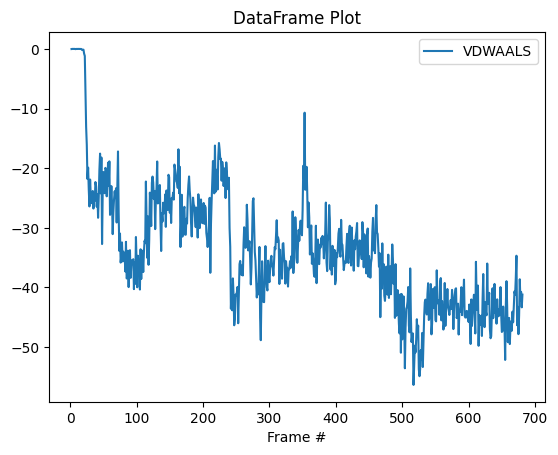

In [19]:
plot = df.plot(df.columns[0], df.columns[7], title="DataFrame Plot")

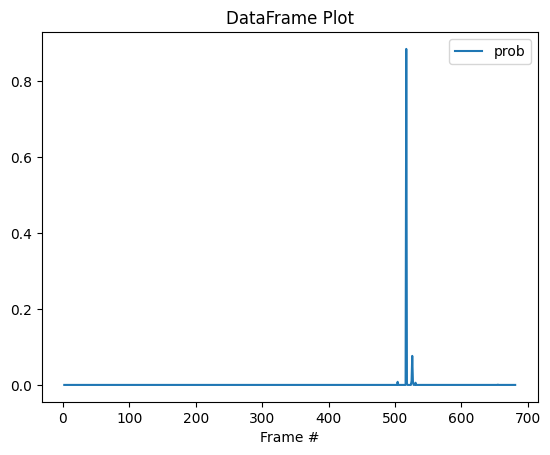

In [20]:
plot = new_df.plot(new_df.columns[0], new_df.columns[3], title="DataFrame Plot")

In [21]:
new_df['weigthed_vdw'] = ( new_df['VDWAALS'] * new_df['prob'] )

In [22]:
new_df

,Frame #,VDWAALS,boltz_vdw,prob,weigthed_vdw
0,2,-0.03,9.528311e-42,8.424536e-42,-2.527361e-43
1,3,-0.01,9.213958e-42,8.146598e-42,-8.146598e-44
2,4,-0.01,9.213958e-42,8.146598e-42,-8.146598e-44
3,5,-0.02,9.369816e-42,8.284402e-42,-1.656880e-43
4,6,-0.01,9.213958e-42,8.146598e-42,-8.146598e-44
...,...,...,...,...,...
675,677,-38.63,1.254679e-13,1.109335e-13,-4.285361e-12
676,678,-42.26,5.532645e-11,4.891734e-11,-2.067247e-09
677,679,-40.74,4.321512e-12,3.820901e-12,-1.556635e-10
678,680,-43.33,3.329750e-10,2.944026e-10,-1.275647e-08


In [23]:
e_avg = new_df['weigthed_vdw'].sum()
print("\n\t <E_vdw> = %5.2f kcal/mol" % e_avg)


	 <E_vdw> = -56.12 kcal/mol


In [24]:
list(new_df['weigthed_vdw']).index(min(list(new_df['weigthed_vdw'])))

515